In [ ]:
import numpy as np
import tensorflow as tf
from google.colab import drive
import os
from os.path import isfile, join
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from sklearn import preprocessing
import random

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_folder = '/content/drive/MyDrive/Colab Notebooks/UAH-DRIVESET-v1'
shape = 40

In [ ]:
def get_dataset(data_path, train_per = 0.70, val_per = 0.1, test_per = 0.2):
    # initialize data variable as list
    X_train, Y_train, X_val, Y_val, X_test, Y_test = [], [], [], [], [], []

    for root, dirs, files in os.walk(data_path, topdown=False):
        if len(files) < 2:
            continue
        else:
            gps_df = get_data_list(root)
            random.shuffle(gps_df)

            train_split_index = int(train_per * len(gps_df))
            val_split_index = int(val_per * len(gps_df)) + train_split_index

            X_train.extend(gps_df[: train_split_index])
            for i in range(train_split_index):
              Y_train.append([root.split("/")[-1].split("-")[2], get_trip_labels(root), get_road_type(root)])

            X_val.extend(gps_df[train_split_index:val_split_index])
            for i in range(train_split_index, val_split_index):
              Y_val.append([root.split("/")[-1].split("-")[2], get_trip_labels(root), get_road_type(root)])

            X_test.extend(gps_df[val_split_index:])
            for i in range(val_split_index, len(gps_df)):
              Y_test.append([root.split("/")[-1].split("-")[2], get_trip_labels(root), get_road_type(root)])

    labels_columns = ["driver", "type", "road"]
    Y_train = pd.DataFrame(data= np.array(Y_train), columns=labels_columns)
    Y_val = pd.DataFrame(data= np.array(Y_val), columns=labels_columns)
    Y_test = pd.DataFrame(data= np.array(Y_test), columns=labels_columns)
    X_train = np.array(X_train)
    X_val = np.array(X_val)
    X_test = np.array(X_test)
    return X_train, Y_train, X_val, Y_val, X_test, Y_test


def get_data_list(root, shape=shape):
    data_list = []
    gps_df = import_uah_trip_data(root)
    # df.latitude.diff().shift(-1)

    # print(gps_df["driver"])
    gps_df["delta_latitude"] = gps_df.latitude.diff()
    gps_df["delta_longitude"] = gps_df.longitude.diff()
    gps_df["delta_altitude"] = gps_df.altitude.diff()
    gps_df["delta_latitude"][0] = 0
    gps_df["delta_longitude"][0] = 0
    gps_df["delta_altitude"][0] = 0
    # gps_df["driver"] = int((root.split("/")[-1].split("-")[2]).replace("D",""))
    gps_df["road_type"] = get_road_type(root)
    # gps_df = gps_df.drop(columns=['longitude', 'latitude', 'altitude'])
    divisions = int(len(gps_df)/shape)
    gps_df = gps_df[:divisions * shape]
    for i in range(divisions):
      data_list.append(gps_df[shape * (i):shape * (i+1)])
    return data_list

def import_uah_trip_data(root_path):
    # import raw inertial data
    gps_file_path = os.path.join(root_path, "RAW_GPS.txt")
    gps_df = pd.read_csv(gps_file_path, sep=" ", header=None).iloc[:, 0:7]
    # add the column names
    gps_df.columns = [
        "timestamp",
        "speed",
        "latitude",
        "longitude",
        "altitude",
        "verticalAccuracy",
        "horizentalAccuracy",
    ]
    
    dataFrame = pd.DataFrame(data=gps_df, columns=gps_df.columns)
 
    return dataFrame

def get_trip_labels(file_path):
    if "NORMAL" in file_path:
        label = "NORMAL"
    elif "AGGRESSIVE" in file_path:
        label = "AGGRESSIVE"
    elif "DROWSY" in file_path:
        label = "DROWSY"
    else:
        label = None
    return label


def get_road_type(file_path):
    if "SECONDARY" in file_path:
        return 1
    elif "MOTORWAY" in file_path:
        return 2
    else:
        return None


In [ ]:
X_train, Y_train, X_val, Y_val, X_test, Y_test = get_dataset(data_folder)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
print(X_train.shape)

print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)
print(X_val.shape)
print(Y_val.shape)


(510, 40, 11)
(510, 3)
(189, 40, 11)
(189, 3)
(56, 40, 11)
(56, 3)


In [ ]:
X_train[:]

array([[[ 9.6530000e+01,  1.0970000e+02,  4.0533073e+01, ...,
         -3.1900000e-04,  1.5000000e+00,  1.0000000e+00],
        [ 9.7530000e+01,  1.0970000e+02,  4.0533073e+01, ...,
          0.0000000e+00,  0.0000000e+00,  1.0000000e+00],
        [ 9.8550000e+01,  1.1170000e+02,  4.0533295e+01, ...,
         -6.7000000e-04,  2.7000000e+00,  1.0000000e+00],
        ...,
        [ 1.3351000e+02,  1.1130000e+02,  4.0533817e+01, ...,
         -3.7000000e-04,  5.0000000e-01,  1.0000000e+00],
        [ 1.3456000e+02,  1.1050000e+02,  4.0533813e+01, ...,
         -3.6500000e-04, -9.0000000e-01,  1.0000000e+00],
        [ 1.3548000e+02,  1.1050000e+02,  4.0533813e+01, ...,
          0.0000000e+00,  0.0000000e+00,  1.0000000e+00]],

       [[ 4.1657000e+02,  8.7800000e+01,  4.0556759e+01, ...,
         -2.9200000e-04, -1.4000000e+00,  1.0000000e+00],
        [ 4.1751000e+02,  8.8500000e+01,  4.0556763e+01, ...,
         -2.9100000e-04, -6.0000000e-01,  1.0000000e+00],
        [ 4.1851000e+02, 

In [ ]:
Y_val

,driver,type,road
0,D2,AGGRESSIVE,1
1,D2,DROWSY,2
2,D2,DROWSY,2
3,D2,AGGRESSIVE,2
4,D2,AGGRESSIVE,2
5,D2,DROWSY,1
6,D2,NORMAL,1
7,D2,NORMAL,1
8,D2,NORMAL,2
9,D2,NORMAL,2


In [ ]:

type = 0

if type == 0:
    for i in range(len(X_train[0,0])):
        train_min, train_max = X_train[:,0,i].min(),X_train[:,0,i].max() 
        X_train[:,0,i] = (X_train[:,0,i] - train_min)/(train_max - train_min)
        X_val[:,0,i] = (X_val[:,0,i] - train_min)/(train_max - train_min)
        X_test[:,0,i] = (X_test[:,0,i] - train_min)/(train_max - train_min)
elif type == 1:
    for i in range(len(X_train[0,0])):
        train_mean, train_std = X_train[:,0,i].mean(),X_train[:,0,i].std() 
        X_train[:,0,i] = (X_train[:,0,i] - train_mean)/train_std
        X_val[:,0,i] = (X_val[:,0,i] - train_mean)/train_std
        X_test[:,0,i] = (X_test[:,0,i] - train_mean)/train_std

In [ ]:

Y_train_oh = pd.get_dummies(Y_train.type, prefix='type')
Y_val_oh = pd.get_dummies(Y_val.type, prefix='type')
Y_test_oh = pd.get_dummies(Y_test.type, prefix='type')
Y_train_oh

,type_AGGRESSIVE,type_DROWSY,type_NORMAL
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
505,1,0,0
506,1,0,0
507,1,0,0
508,1,0,0


In [ ]:
def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        """Recall metric.

        Only computes a batch-wise average of recall.

        Computes the recall, a metric for multi-label classification of
        how many relevant items are selected.
        """
        true_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true * y_pred, 0, 1)))
        possible_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + tf.keras.backend.epsilon())
        return recall

    def precision(y_true, y_pred):
        """Precision metric.

        Only computes a batch-wise average of precision.

        Computes the precision, a metric for multi-label classification of
        how many selected items are relevant.
        """
        true_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true * y_pred, 0, 1)))
        predicted_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + tf.keras.backend.epsilon())
        return precision
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+tf.keras.backend.epsilon()))

In [ ]:
def my_model_fully_connected(k = 3, lr = 1e-4, ishape = (shape,11), drop_out = 0.1, weight_decay = 1e-4):
    model_input = tf.keras.layers.Input(shape=ishape)
    model_input_flatten = tf.keras.layers.Flatten()(model_input)


    # l0 = tf.keras.layers.Dense(1024, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.L2(weight_decay))(model_input_flatten)
    # l0_Batch = tf.keras.layers.BatchNormalization()(l0)


    l1 = tf.keras.layers.Dense(512, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.L2(weight_decay))(model_input_flatten)
    l1_Batch = tf.keras.layers.BatchNormalization()(l1)
    # l1_dropOut = tf.keras.layers.Dropout(drop_out)(l1_Batch)

    l2 = tf.keras.layers.Dense(512, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.L2(weight_decay))(l1_Batch)
    l2_Batch = tf.keras.layers.BatchNormalization()(l2)
    # l2_dropOut = tf.keras.layers.Dropout(2*drop_out)(l2_Batch)

    l3 = tf.keras.layers.Dense(256, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.L2(weight_decay))(l2_Batch)
    l3_Batch = tf.keras.layers.BatchNormalization()(l3)
    # l3_dropOut = tf.keras.layers.Dropout(3*drop_out)(l3_Batch)

    l4 = tf.keras.layers.Dense(256, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.L2(weight_decay))(l3_Batch)
    l4_Batch = tf.keras.layers.BatchNormalization()(l4)
    # l4_dropOut = tf.keras.layers.Dropout(4*drop_out)(l4_Batch)

    l5 = tf.keras.layers.Dense(128, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.L2(weight_decay))(l4_Batch)
    l5_Batch = tf.keras.layers.BatchNormalization()(l5)
    # l5_dropOut = tf.keras.layers.Dropout(5*drop_out)(l5_Batch)

    l6 = tf.keras.layers.Dense(128, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.L2(weight_decay))(l5_Batch)
    l6_Batch = tf.keras.layers.BatchNormalization()(l6)
    # l6_dropOut = tf.keras.layers.Dropout(5*drop_out)(l6_Batch)

    l7 = tf.keras.layers.Dense(64, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.L2(weight_decay))(l6_Batch)
    l7_Batch = tf.keras.layers.BatchNormalization()(l7)
    # l7_dropOut = tf.keras.layers.Dropout(3*drop_out)(l7_Batch)

    l8 = tf.keras.layers.Dense(64, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.L2(weight_decay))(l7_Batch)
    l8_Batch = tf.keras.layers.BatchNormalization()(l8)
    # l8_dropOut = tf.keras.layers.Dropout(5*drop_out)(l8_Batch)

    l9 = tf.keras.layers.Dense(32, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.L2(weight_decay))(l8_Batch)
    l9_Batch = tf.keras.layers.BatchNormalization()(l9)
    # l9_dropOut = tf.keras.layers.Dropout(5*drop_out)(l9_Batch)

    l10 = tf.keras.layers.Dense(16, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.L2(weight_decay))(l9_Batch)
    l10_Batch = tf.keras.layers.BatchNormalization()(l10)
    
    
    out = tf.keras.layers.Dense(k,activation = 'softmax')(l10_Batch)
    model = tf.keras.models.Model(inputs = model_input, outputs = out)
    opt_rms = tf.keras.optimizers.RMSprop(lr=lr,decay=1e-6)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr), loss='categorical_crossentropy', metrics = ["accuracy", f1])
    return model

In [ ]:
model_FC = my_model_fully_connected()
print(model_FC.summary())

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 40, 11)]          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 440)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 512)               225792    
_________________________________________________________________
batch_normalization_20 (Batc (None, 512)               2048      
_________________________________________________________________
dense_23 (Dense)             (None, 512)               262656    
_________________________________________________________________
batch_normalization_21 (Batc (None, 512)               2048      
_________________________________________________________________
dense_24 (Dense)             (None, 256)               1313

In [ ]:
model_name_fcn = "team_4_FCN.h5"

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 40)

monitor = tf.keras.callbacks.ModelCheckpoint(model_name_fcn, monitor='val_loss',\
                                             verbose=0,save_best_only=True,\
                                             save_weights_only=True,\
                                             mode='min')
# Learning rate schedule
def scheduler(epoch, lr):
    if epoch%60 == 0:
        lr = lr/2
    return lr

lr_schedule = tf.keras.callbacks.LearningRateScheduler(scheduler,verbose = 0)

In [ ]:
history_FC = model_FC.fit(X_train, Y_train_oh, batch_size = 32, epochs = 220, verbose = 1, callbacks=[early_stop, monitor, lr_schedule], validation_data = (X_val, Y_val_oh))

Epoch 1/220
16/16 [==============================] - 4s 48ms/step - loss: 1.6935 - accuracy: 0.3571 - f1: 0.3093 - val_loss: 1.3553 - val_accuracy: 0.4107 - val_f1: 0.4115
Epoch 2/220
16/16 [==============================] - 0s 18ms/step - loss: 1.3397 - accuracy: 0.4464 - f1: 0.3614 - val_loss: 1.3395 - val_accuracy: 0.4107 - val_f1: 0.4115
Epoch 3/220
16/16 [==============================] - 0s 17ms/step - loss: 1.2477 - accuracy: 0.4974 - f1: 0.3982 - val_loss: 1.3264 - val_accuracy: 0.4107 - val_f1: 0.4115
Epoch 4/220
16/16 [==============================] - 0s 18ms/step - loss: 1.2283 - accuracy: 0.4936 - f1: 0.3931 - val_loss: 1.3156 - val_accuracy: 0.4107 - val_f1: 0.4115
Epoch 5/220
16/16 [==============================] - 0s 18ms/step - loss: 1.2540 - accuracy: 0.4394 - f1: 0.3146 - val_loss: 1.3061 - val_accuracy: 0.4107 - val_f1: 0.4115
Epoch 6/220
16/16 [==============================] - 0s 18ms/step - loss: 1.1994 - accuracy: 0.4867 - f1: 0.3793 - val_loss: 1.2984 - val_ac

Final loss (cross-entropy and accuracy, F1): [1.3039954900741577, 0.3650793731212616, 0.2782268822193146]


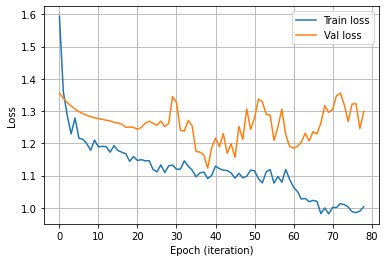

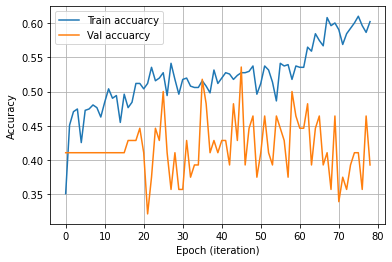

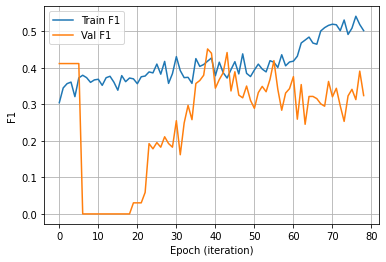

In [ ]:
model_FC.load_weights(model_name_fcn)
loss_FC = model_FC.evaluate(X_test, Y_test_oh, verbose=0)
print('Final loss (cross-entropy and accuracy, F1):',loss_FC)

plt.plot(history_FC.history['loss'], label = "Train loss")
plt.plot(history_FC.history['val_loss'], label = "Val loss")
plt.xlabel("Epoch (iteration)")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()


plt.plot(history_FC.history['accuracy'], label = "Train accuarcy")
plt.plot(history_FC.history['val_accuracy'], label = "Val accuarcy")
plt.xlabel("Epoch (iteration)")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()

plt.plot(history_FC.history['f1'], label = "Train F1")
plt.plot(history_FC.history['val_f1'], label = "Val F1")
plt.xlabel("Epoch (iteration)")
plt.ylabel("F1")
plt.legend()
plt.grid()
plt.show()